In [1]:
# Pandas Intermediate to Advance
# What's covered?
# Combining Data From Multiple Tables using pd.merge() Function
# how argument
# Learning with Two Example DataFrame
# Applying Inner Join
# Applying Left Join
# Applying Right Join
# Applying Outer Join
# Applying Cross Join
# Brief primer on merge methods (relational algebra)
# Solving a Case Study by Joining Multiple Tables
# Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv
# Joining Purchase Table with Customer and Product Table
# Generating Basic Reports on the Data
# Visual Data Analysis using Pandas (Plotting)
# Reading .csv File - Iris Data
# Histogram Plot
# KDE Plot
# Box Plot
# Vertical and Horizontal Bar Plot
# Scatter Plot

SyntaxError: unterminated string literal (detected at line 2) (679789752.py, line 2)

# Pandas intermediate to Advance

# Combind Data From Multiple Tables using pd.merge()

In [2]:
# Syntax pd.merge(left, right, how = 'inner', on = None)


In [3]:
import pandas as pd
import numpy as np

In [5]:
left = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [6]:
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [8]:
result = pd.merge(left, right, on = 'key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [9]:
result1 = pd.merge(left, right, how = 'inner', on = 'key')
result1

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/merge.xlsx")


In [3]:
df.head()

,Merge method (how),SQL Join Name,Description,Important Pointer
0,inner,INNER JOIN,Use intersection of keys from both frames,Display matching records from both tables
1,left,LEFT OUTER JOIN,Use keys from left frame only,Display all records from the left table and ma...
2,right,RIGHT OUTER JOIN,Use keys from right frame only,Display all records from the right table and m...
3,outer,FULL OUTER JOIN,Use union of keys from both frames,Keep all the records from both tables
4,cross,CROSS JOIN,Create the cartesian product of rows of both f...,Cartesian Product


In [21]:
# method trong merge

## Learning with Two Example DataFrame

In [4]:
left = pd.DataFrame({"key1": ["K0", "K0", "K1", "K2"], 
                     "key2": ["K0", "K1", "K0", "K1"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [5]:
right = pd.DataFrame({"key1": ["K0", "K1", "K1", "K2"], 
                      "key2": ["K0", "K0", "K0", "K0"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [6]:
# innner  là lấy giao 
result = pd.merge(left, right, on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [7]:

result = pd.merge(left, right, how="inner", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [8]:
# key1, key2 nghĩa là cả 2 đều có cặp
# (K0, K0)
#(K1, K0)
#(k1, k0)

## Applying left Join


In [10]:
result = pd.merge(left, right, how = 'left', on = ['key1', 'key2'])


In [11]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [12]:
# hiểu đơn giản tôi có 2 vòng tròn giao nhau 
# thì left lấy hết bên vòng trái và lấy phần giao


In [13]:
result = pd.merge(left, right, how = 'right', on = ['key1', 'key2'])
result


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [14]:
# với right giống hệt left

    

## Applying Outer Join

In [15]:
result = pd.merge(left, right, how = 'outer', on = ['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [16]:
# outer là lấy hết

## Applying Cross Join

In [17]:
result = pd.merge(left, right, how =  'cross')
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


In [18]:
#giống xác suất nhân ghi sử dụng cross 

## Solve a Case Study with merge()

In [20]:
cust_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/customer_data.csv")

In [22]:
prod_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/product_data.csv")

In [23]:
pur_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/purchase_data.csv")

In [24]:
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


In [25]:
prod_df.head()

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


In [26]:
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [27]:
# đầu tiên nối cust_df với pur_df vì nó cùng cust_id

In [28]:
df = pd.merge(pur_df, cust_df, how = "inner", on = "cust_id")

In [30]:
df.head(10)

,cust_id,prod_id,cust_name
0,cust_12345,p_001,Sally
1,cust_12346,p_003,Jenna
2,cust_12347,p_002,Eliana
3,cust_12348,p_004,Cristen
4,cust_12349,p_001,Steve
5,cust_12350,p_001,Kelli
6,cust_12351,p_004,Carmelita
7,cust_12352,p_001,Aretha
8,cust_12353,p_003,Pansy
9,cust_12354,p_002,Jennell


In [31]:
df = pd.merge(df, prod_df, how='inner', on='prod_id')
df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning


In [32]:
df

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning
5,cust_12350,p_001,Kelli,Machine Learning
6,cust_12351,p_004,Carmelita,Competitive Programming
7,cust_12352,p_001,Aretha,Machine Learning
8,cust_12353,p_003,Pansy,Full Stack Development
9,cust_12354,p_002,Jennell,Data Structures


In [33]:
df.prod_name.value_counts()

prod_name
Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: count, dtype: int64

## Generating Basic Reports on the Data

In [34]:
grouped_df = df.groupby("prod_name")

In [35]:
grouped_df.groups

{'Competitive Programming': [3, 6, 15, 17, 21, 23], 'Data Structures': [2, 9, 11, 16, 19, 20, 26, 27, 28], 'Full Stack Development': [1, 8, 14, 18, 25], 'Machine Learning': [0, 4, 5, 7, 10, 12, 13, 22, 24]}

In [36]:
grouped_df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning
5,cust_12350,p_001,Kelli,Machine Learning
6,cust_12351,p_004,Carmelita,Competitive Programming
7,cust_12352,p_001,Aretha,Machine Learning
8,cust_12353,p_003,Pansy,Full Stack Development
9,cust_12354,p_002,Jennell,Data Structures


In [37]:
grouped_df.first()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12348,p_004,Cristen
Data Structures,cust_12347,p_002,Eliana
Full Stack Development,cust_12346,p_003,Jenna
Machine Learning,cust_12345,p_001,Sally


In [38]:
grouped_df.last()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12368,p_004,Georgetta
Data Structures,cust_12357,p_002,Normand
Full Stack Development,cust_12370,p_003,Angla
Machine Learning,cust_12369,p_001,Dung


In [39]:
grouped_df.get_group("Machine Learning") # mỗi ML

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
4,cust_12349,p_001,Steve,Machine Learning
5,cust_12350,p_001,Kelli,Machine Learning
7,cust_12352,p_001,Aretha,Machine Learning
10,cust_12355,p_001,Carla,Machine Learning
12,cust_12357,p_001,Normand,Machine Learning
13,cust_12358,p_001,Nam,Machine Learning
22,cust_12367,p_001,Taunya,Machine Learning
24,cust_12369,p_001,Dung,Machine Learning


In [40]:
grouped_df.describe(include = "all")

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

# Visual Data Analysis using pandas(Plotting)

### Syntax : DataFrame.plot(kind = "kind")

In [51]:
# các loại kind phổ biến, biểu đồ phổ biến
# line : biểu đồ đường mặc định
# bar : biểu đồ cột dọc
# barh : biểu đồ cột nằm ngang
# hist: biểu đồ histogram
# box : boxplot biểu đồ hộp)
# area" biểu đồ vùng
#pie : biểu đồ tròn
# scatter: biểu đồ scatter(phải truyền x và y)
# hexbin : biểu đồ hexbin(mật độ điểm 2D)
#kde là đường cong biểu diễn phân phối xác suất

In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/Iris.csv")

In [45]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


<Axes: ylabel='Frequency'>

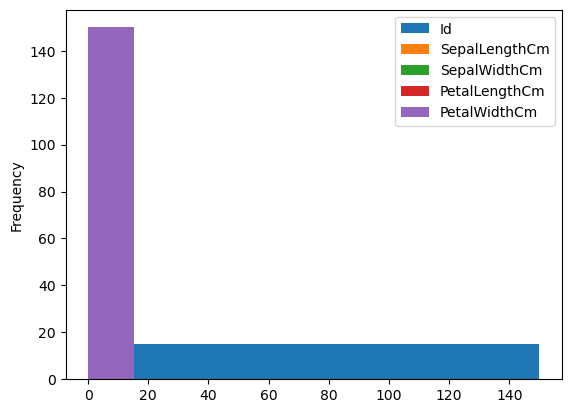

In [47]:
df.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

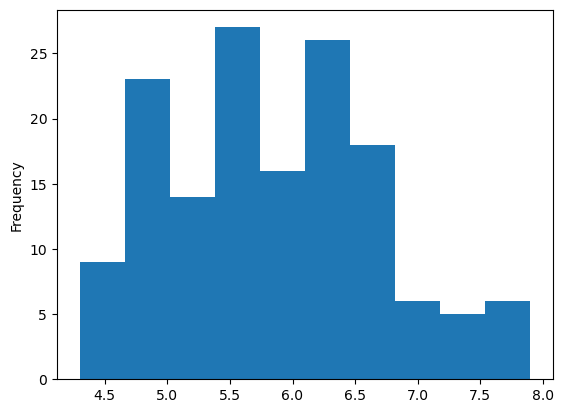

In [48]:
df['SepalLengthCm'].plot(kind = 'hist')

<Axes: ylabel='Count'>

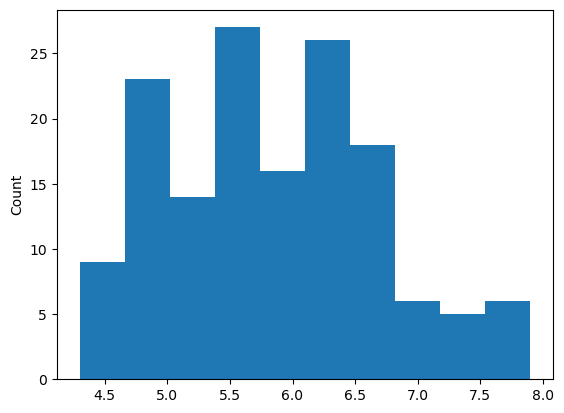

In [50]:
df['SepalLengthCm'].plot(kind = 'hist', ylabel = "Count") # đổi tên

In [52]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Kde Plot

<Axes: ylabel='Density'>

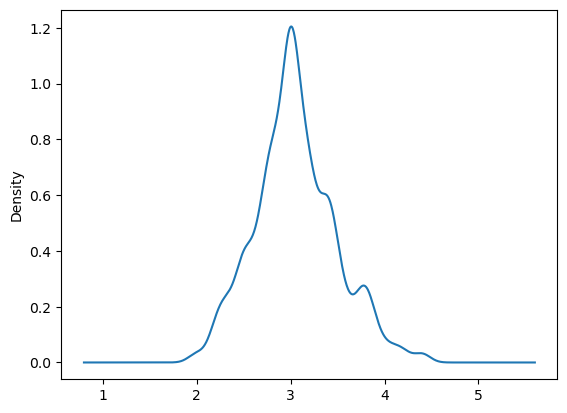

In [55]:
df['SepalWidthCm'].plot(kind = "kde", ylabel = "So luong", bw_method = 0.2)

## Box Plot

<Axes: >

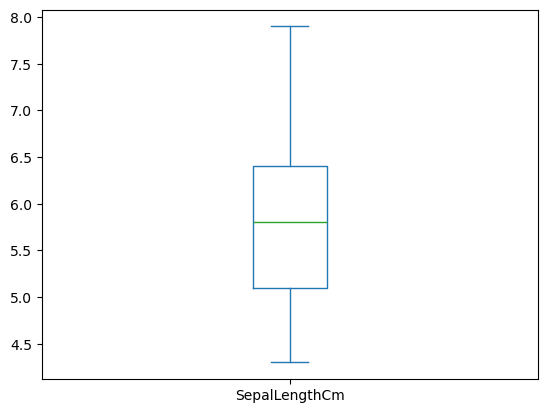

In [57]:
df['SepalLengthCm'].plot(kind = 'box')

## Vertical and Horizontal Bar Plot



In [58]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species'>

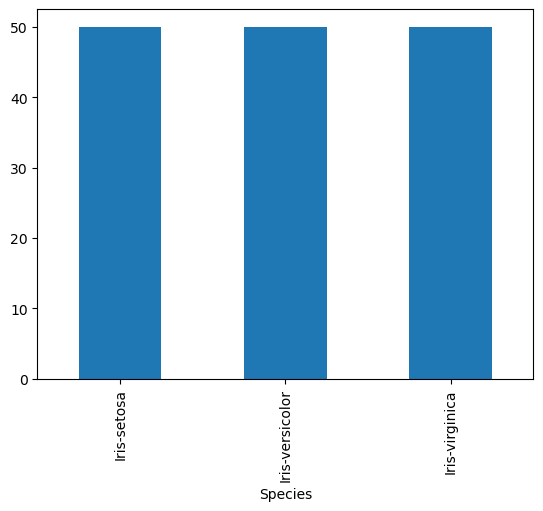

In [59]:
df['Species'].value_counts().plot(kind = 'bar') # vertical dọc

<Axes: ylabel='Species'>

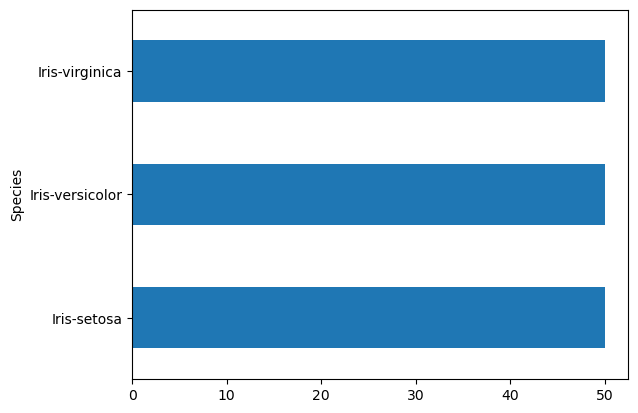

In [61]:
df['Species'].value_counts().plot(kind = 'barh') # horizontal ngang

In [62]:
# when using scatter Plot


## Scatter Plot

<Axes: title={'center': 'Chieu cao va can nang'}, xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

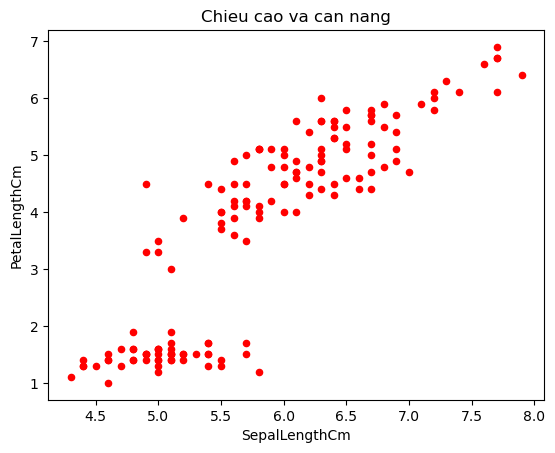

In [65]:
# kiểm tra tương quan giữa 2 biến 
# phải có x, y là 2 tương quan của 2 biến
df.plot(x = "SepalLengthCm", y = "PetalLengthCm", kind = "scatter", color = "red", title = "Chieu cao va can nang")

## Melt()

In [66]:
# ví dụ trong 1 hàng tôi có điểm toán và văn giờ tôi muốn tách vẫn thành 1 bảng nhưng toán văn sẽ cùng 1 cột

In [67]:
import pandas as pd

df = pd.DataFrame({
    'Tên': ['A', 'B', 'C'],
    'Toán': [90, 80, 70],
    'Văn': [85, 75, 65]
})
print(df)

  Tên  Toán  Văn
0   A    90   85
1   B    80   75
2   C    70   65


In [68]:
df_melt = pd.melt(df, id_vars = ['Tên'], var_name = "Môn", value_name = "Điểm")

In [69]:
df_melt

,Tên,Môn,Điểm
0,A,Toán,90
1,B,Toán,80
2,C,Toán,70
3,A,Văn,85
4,B,Văn,75
5,C,Văn,65


In [70]:
# id_vars cột giữ nguyên
# var_name  : tên cột mới chứa tên biến 
# value_name: tên cột mới chứa giá trị